# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder

In [3]:
import os
os.chdir(r"/content/drive/My Drive/DLCP/Computer_Vision/data/")
os.getcwd()

'/content/drive/My Drive/DLCP/Computer_Vision/data'

### Load the "images.npy" file
- This file contains images with details of bounding boxes

In [4]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.0875, 'y': 0.044293015332197615}, {'x': 0.165625, 'y': 0.2061328790459966}], 'imageWidth': 640, 'imageHeight': 587}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.19375, 'y': 0.04088586030664395}, {'x': 0.3421875, 'y': 0.24701873935264054}], 'imageWidth': 640, 'imageHeight': 587}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.478125, 'y': 0.03236797274275979}, {'x': 0.7859375, 'y': 0.37137989778534924}], 'imageWidth': 640, 'imageHeight': 587}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.759375, 'y': 0.5996592844974447}, {'x': 0.95, 'y': 0.8603066439522998}], 'imageWidth': 640, 'imageHeight': 587}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.53125, 'y': 0.5315161839863713}, {'x': 0.6453125, 'y': 0.6592844974446337}], 'imageWidth': 640, 'imageHeight': 587}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.0734375, 'y': 0.5264054514480409}, {'x': 0.19375, 'y': 0.6473594548551959}], 'imageWidth': 640, 'imag

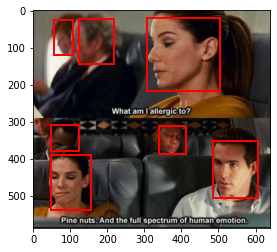

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
N = 36 #10
print(data[N][1])
img = data[N][0]
H, W, n = img.shape[0], img.shape[1], len(data[N][1])
print("\n", N, W, H, n)
fig, ax = plt.subplots(1) # Create figure and axes
ax.imshow(img) # Display the image
for n in data[N][1]: # Add the patch to the Axes
  x0, y0, x1, y1 = int(n['points'][0]['x']*W), int(n['points'][0]['y']*H), int(n['points'][1]['x']*W), int(n['points'][1]['y']*H)
  rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
plt.show()

### Set image dimensions
- Initialize image height, image width with value: 224 

In [6]:
ALPHA = 1

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

IMAGE_SIZE = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [7]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(409, 224, 224, 3)


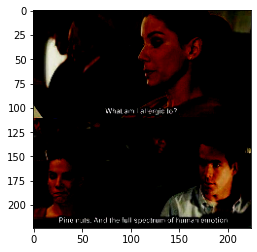

In [8]:
print(X_train.shape)
plt.imshow(X_train[N])

(409, 224, 224)


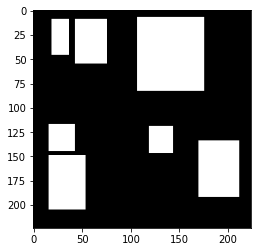

In [9]:
print(masks.shape)
plt.imshow(masks[N], cmap = 'gray')

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

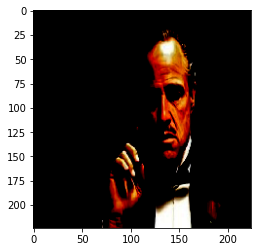

In [10]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

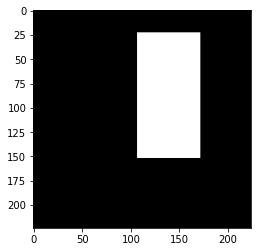

In [11]:
pyplot.imshow(masks[n], cmap = 'gray')

In [12]:
X_test = X_train[400:] # Moving last 9 images for testing
X_train = X_train[:400]
y_test = masks[400:]
y_train = masks[:400]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 224, 224, 3) (9, 224, 224, 3) (400, 224, 224) (9, 224, 224)


## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet") # 224 × 224 × 3
    for layer in model.layers:
        layer.trainable = trainable

    block = model.get_layer("conv_pw_1_relu").output # 112 × 112 × 64
    block1 = model.get_layer("conv_pw_3_relu").output # 56 × 56 × 128
    block2 = model.get_layer("conv_pw_5_relu").output # 28 × 28 × 256
    block3 = model.get_layer("conv_pw_11_relu").output # 14 × 14 × 512
    block4 = model.get_layer("conv_pw_13_relu").output # 7 × 7 × 1024

    x = Concatenate()([UpSampling2D()(block4), block3]) # 14 × 14 × 1024 & 14 × 14 × 512 (1536)
    x = Concatenate()([UpSampling2D()(x), block2]) # 28 × 28 × 1536 & 28 × 28 × 256 (1792)
    x = Concatenate()([UpSampling2D()(x), block1]) # 56 × 56 × 1792 & 56 × 56 × 128 (1920)
    x = Concatenate()([UpSampling2D()(x), block]) # 112 × 112 × 1920 & 112 × 112 × 64 (1984)
    x = UpSampling2D()(x) # 224 × 224 × 1984
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x) # 224 × 224 × 1
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x) # 224 × 224

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [14]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [15]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred) # 2 * intersection
    denominator = tensorflow.reduce_sum(y_true + y_pred) # Union + Intersection
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss

In [16]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [19]:
callback = [checkpoint, stop, reduce_lr]
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=1, callbacks=callback)

Epoch 1/100
319/320 [============================>.] - ETA: 0s - loss: 2.0592 - dice_coefficient: 0.2567
Epoch 00001: loss improved from inf to 2.05757, saving model to model-2.06.h5
320/320 [==============================] - 10s 32ms/step - loss: 2.0576 - dice_coefficient: 0.2568 - val_loss: 1.4450 - val_dice_coefficient: 0.3562 - lr: 1.0000e-04
Epoch 2/100
320/320 [==============================] - ETA: 0s - loss: 1.3562 - dice_coefficient: 0.3964
Epoch 00002: loss improved from 2.05757 to 1.35620, saving model to model-1.36.h5
320/320 [==============================] - 10s 30ms/step - loss: 1.3562 - dice_coefficient: 0.3964 - val_loss: 1.1516 - val_dice_coefficient: 0.4355 - lr: 1.0000e-04
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 1.1597 - dice_coefficient: 0.4559
Epoch 00003: loss improved from 1.35620 to 1.15809, saving model to model-1.16.h5
320/320 [==============================] - 10s 30ms/step - loss: 1.1581 - dice_coefficient: 0.4564 - val_loss: 

### Get the predicted mask for a sample image

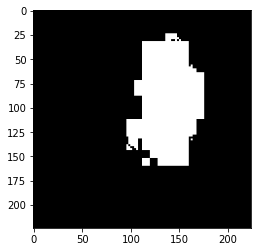

In [20]:
n = 10
sample_image = X_train[n]

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
plt.imshow(pred_mask, cmap = 'gray')

### Impose the mask on the image

In [21]:
def impose(mask, image):
  image1, image2 = image.copy(), image.copy()
  image1[:,:,0] = mask*image2[:,:,0]
  image1[:,:,1] = mask*image2[:,:,1]
  image1[:,:,2] = mask*image2[:,:,2]
  return image1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


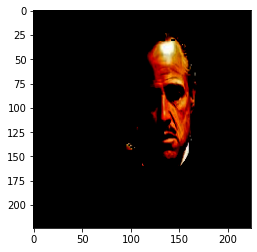

In [22]:
pred_image = impose(pred_mask, sample_image)
plt.imshow(pred_image)

401


Text(0.5, 1.0, 'Predicted Mask')

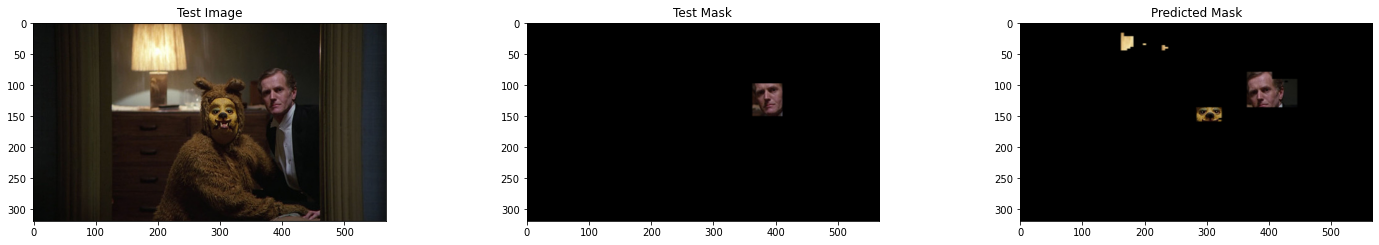

In [23]:
import random
n = random.randint(400, 408)
print(n)

image_org = data[n][0]

act_mask = cv2.resize(masks[n], (image_org.shape[1], image_org.shape[0]))
act_image = impose(act_mask, image_org)

image_sca = cv2.resize(image_org, (IMAGE_WIDTH, IMAGE_HEIGHT))
prep_sca = preprocess_input(np.array(image_sca, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([prep_sca]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))
pred_mask = cv2.resize(pred_mask, (image_org.shape[1], image_org.shape[0]))
pred_image = impose(pred_mask, image_org)

fig = plt.figure(figsize=(24, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image_org)
ax.set_title('Test Image')
ax = fig.add_subplot(1, 3, 2)
ax.imshow(act_image)
ax.set_title('Test Mask')
ax = fig.add_subplot(1, 3, 3)
ax.imshow(pred_image)
ax.set_title('Predicted Mask')